## **The aim of this study is to classify the types of date fruits by using a Machine learning methods***
## **Here I use Scikit Learn Random Forest Classifier*
        
Fruit names are : Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai 

A great number of fruits are grown around the world, each of which has various types. 
The factors that determine the type of fruit are the external appearance features such as color, length, diameter, and shape. 



In [1]:
import numpy as np
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install openpyxl

# **My work flow**
1. clean data
2. import the prediction model
3. create np seed
4. create X and y
5. train the model
6. fit the model
7. evaluate the model
8. predict the model

In [3]:
flow = [
    '1. clean data',
    '2. import the prediction model',
    '3. create np seed',
    '4. create X and y',
    '5. Preprocessing : train the model',
    '6. fit the model',
    '7. evaluate the model',
    '8. predict the model'
]

In [4]:
fruit = pd.read_excel ('Date_Fruit_Datasets.xlsx')
fruit.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


## **1. Lets prepare and clean the data**

In [5]:
# check the data type
fruit.dtypes[:10]

AREA              int64
PERIMETER       float64
MAJOR_AXIS      float64
MINOR_AXIS      float64
ECCENTRICITY    float64
EQDIASQ         float64
SOLIDITY        float64
CONVEX_AREA       int64
EXTENT          float64
ASPECT_RATIO    float64
dtype: object

In [6]:
# check the shape
fruit.shape

(898, 35)

In [7]:
# check for NaNs
fruit.isna().sum() [:10]

AREA            0
PERIMETER       0
MAJOR_AXIS      0
MINOR_AXIS      0
ECCENTRICITY    0
EQDIASQ         0
SOLIDITY        0
CONVEX_AREA     0
EXTENT          0
ASPECT_RATIO    0
dtype: int64

In [8]:
X = fruit.drop('Class', axis = 1)
y = fruit['Class']
X.shape, y.shape

((898, 34), (898,))

In [9]:
# Types of fruits
fc = fruit.Class.value_counts().to_frame()
fc

,count
Class,
DOKOL,204
SAFAVI,199
ROTANA,166
DEGLET,98
SOGAY,94
IRAQI,72
BERHI,65


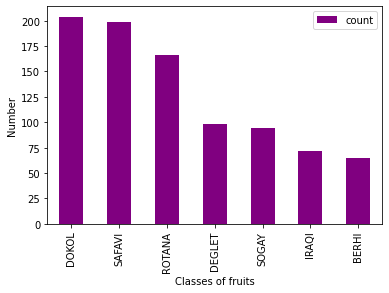

In [10]:
fc.plot(kind = 'bar', xlabel = 'Classes of fruits', ylabel = 'Number', color = 'purple');

## **1a. Lets convert the target = class to numeric =>  using label encoder**

In [11]:
# changing the car categories into to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# now defime our categorical features
categorical_features  = ['Class']
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                 remainder= 'passthrough')   # will take in a turple
                                 
                                 
transformed_y = transformer.fit_transform(y.to_frame())
transformed_y    # this is X that has undergone cleaning

<898x7 sparse matrix of type '<class 'numpy.float64'>'
	with 898 stored elements in Compressed Sparse Row format>

## **2. Import the prediction model**

In [12]:
from sklearn.ensemble import RandomForestClassifier

## **3. Lets create np seed**

In [13]:
np.random.seed(42)

## **4. Create X and y**

## **5. Train and split model**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, transformed_y , test_size = 0.2)

In [15]:
X.shape, y.shape

((898, 34), (898,))

## **6. Fit model**

In [19]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, np.ravel(y_train))

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


AttributeError: 'bool' object has no attribute 'any'

In [ ]:
y_train = np.ravel(y_train,order="c")

## **7. Evaluate the model**

In [ ]:
clf.score(X_test, y_test)  ,  clf.score(X_train, y_train)

## **8. Predict the model classifications**

In [ ]:
y_preds = clf.predict((X_test)) # always predict on X_test
y_preds[:10] 

In [ ]:
np.array(y_test[:10]).T

## **Evaluate the model for accuracy**

In [ ]:
# Evaluation of the model for accuracy
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score

print(f'Training Score:{clf.score(X_train, y_train)}') # inbuilt accuracy score
print(f'Test Score: {clf.score(X_test, y_test)}')     # inbuilt accuracy score
print(f"Classifier Cross Validation_Score: {np.mean(cross_val_score(clf,X,y,cv= 5))}") # cross validation
print(f'Accuracy_score_metric : {accuracy_score(y_test, y_preds)}')# for classifications only

# **fitting the prediction into the test data**

In [ ]:
predict1 = clf.predict(X)
predict2 = pd.DataFrame(predict1,columns = ['predicted'])
predict2.head()

In [ ]:
pd.concat ([fruit, predict2],ignore_index = False, axis = 1).head()

In [ ]:
check_pred_df = (pd.concat ([fruit, predict2],ignore_index = False, axis = 1).loc[:,['Class', 'predicted']].Class == \
pd.concat ([fruit, predict2],ignore_index = False, axis = 1).loc[:,['Class', 'predicted']].predicted).value_counts()
check_pred_df

In [ ]:
predict2.value_counts()

In [ ]:
fruit.Class.value_counts()

## **Confusion Matrix**

In [ ]:
# confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cmatrix = pd.DataFrame(cm, index= ['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'], \
columns =['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'])
cmatrix

In [ ]:
# plot the cm
fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(cmatrix, linewidth=0.3, cmap = 'Reds',xticklabels = True, annot =True)
ax.set(title = 'Confusion Matrix', xlabel = 'Predicted Class', ylabel = 'Actual Class');

## **Classification report**

In [ ]:
cr = classification_report(y_test, y_preds)
print(cr)

## **Finding and conclusion**
1. => The model training score is 100% ie, considers all elements of the datsets
2. => The model test score is 90.5% accuracy level